In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [2]:
# Build the Sequential feedforward neural network model

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(16, activation="relu"),
    Dense(16, activation="softmax"),
])

In [3]:
# Print the model summary

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
Total params: 12,832
Trainable params: 12,832
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [5]:
# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=3),
    Flatten(),
    Dense(10, activation="softmax")
])


In [6]:
# Print the model summary

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [16]:
# Define the model optimizer, loss function and metrics
import tensorflow as tf

opt = tf.keras.optimizers.Adam(learning_rate=0.0005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(
    optimizer=opt,
    loss="sparse_categorical_crossentropy",
    metrics=[acc, mae]
)


In [17]:
# Print the resulting model attributes

print(model.loss)
print(model.optimizer)
print(model.optimizer.lr)
print(model.metrics)



sparse_categorical_crossentropy
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [9]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [10]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [11]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [12]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [13]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / 255
test_images = test_images / 255

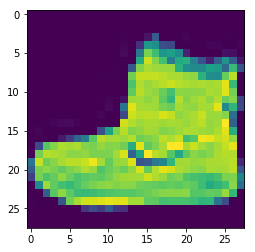

label: Ankle boot


In [14]:
# Display one of the images

image = train_images[0, :, :]
plt.imshow(image)
plt.show()
print(f"label: {labels[train_labels[0]]}")

#### Fit the model

In [ ]:
# Fit the model

history = model.fit(
    train_images[..., np.newaxis],
    train_labels,
    epochs=8,
    batch_size=256
)


Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 58s 972us/sample - loss: 1.0668 - sparse_categorical_accuracy: 0.6697 - mean_absolute_error: 4.4200
Epoch 2/8
18432/60000 [========>.....................] - ETA: 40s - loss: 0.6277 - sparse_categorical_accuracy: 0.7783 - mean_absolute_error: 4.4044

#### Plot training history

In [27]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,1.077082,0.673883,4.420001
1,0.600396,0.785817,4.420000
2,0.527147,0.810083,4.420000
3,0.485630,0.827167,4.420000
4,0.459268,0.837650,4.420000


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

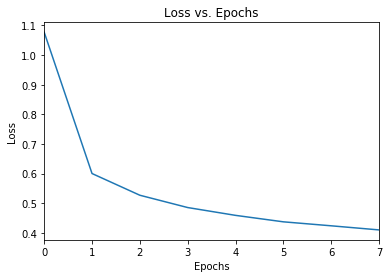

In [32]:
# Make a plot for the loss

loss_plot = df.plot(y="loss", title="Loss vs. Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")

In [34]:
# Make a plot for the accuracy


In [ ]:
# Make a plot for the additional metric




***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [2]:
# Evaluate the model

test_loss, test_accuracy, test_mae = model.evaluate(test_images[..., np.newaxis], test_labels, verbose=2)

NameError: name 'model' is not defined

#### Make predictions from the model

In [ ]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [ ]:
# Get the model predictions

model.predict(test_image)